<a href="https://colab.research.google.com/github/shavindukesara/CM2607-CW-Advanced-Mathematics/blob/main/CM2607_CW_2425582.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
import cv2


In [3]:
# Defining symbols and travel time functions
x, y, a, b, c = sp.symbols('x y a b c', positive=True)

#functions travel time
Tb = a*x**2 + b*y**2
Tt = sp.sqrt(c*(x**2 + y**2))

display(Math(r"T_b(x,y) = " + sp.latex(Tb)))
display(Math(r"T_t(x,y) = " + sp.latex(Tt)))




<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
#Gradient of Bus travel time
grad_Tb = (sp.diff(Tb, x), sp.diff(Tb, y))

display(
    Math(
        r"\nabla T_b = \left(" +
        sp.latex(grad_Tb[0]) + "," +
        sp.latex(grad_Tb[1]) +
        r"\right)"
    )
)



<IPython.core.display.Math object>

In [5]:
#Gradient of Taxi travel time
grad_Tt = (sp.diff(Tt, x), sp.diff(Tt, y))

display(
    Math(
        r"\nabla T_t = \left(" +
        sp.latex(grad_Tt[0]) + "," +
        sp.latex(grad_Tt[1]) +
        r"\right)"
    )
)


<IPython.core.display.Math object>

Q2

In [6]:
# Defining integrals
t = sp.symbols('t')
x = sp.symbols('x', positive=True)

# Define and compute the bus fare integral
Fb = sp.integrate(2*t + 1, (t, 0, x))

# Define and compute the taxi fare integral
Ft = sp.integrate(3*t + 2, (t, 0, x))


display(Math(r"F_b(x) = " + sp.latex(Fb)))
display(Math(r"F_t(x) = " + sp.latex(Ft)))




<IPython.core.display.Math object>

<IPython.core.display.Math object>

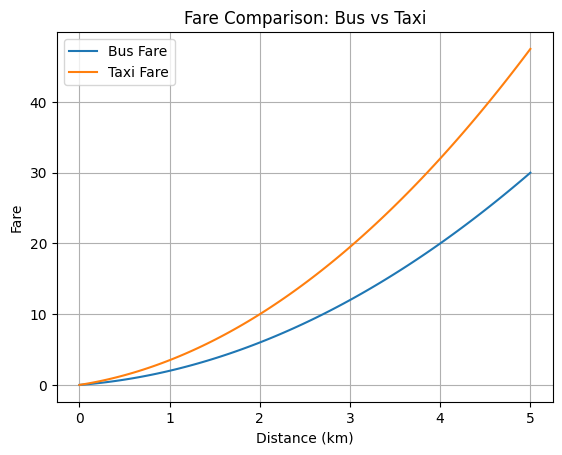

In [7]:
#plotting the graph
# Generate distance values (0 to 5 km)
x_vals = np.linspace(0, 5, 100)

# Evaluate fare functions numerically
Fb_vals = x_vals**2 + x_vals
Ft_vals = 1.5*x_vals**2 + 2*x_vals

# Plot the fare curves
plt.plot(x_vals, Fb_vals, label="Bus Fare")
plt.plot(x_vals, Ft_vals, label="Taxi Fare")

# Label the plot
plt.xlabel("Distance (km)")
plt.ylabel("Fare")
plt.title("Fare Comparison: Bus vs Taxi")
plt.legend()
plt.grid(True)
plt.show()


#Interpretation

The bus fare increases at a slower rate with distance, making it more economical for longer trips.
Whereas, the taxi fare grows more rapidly due to higher base and distance-related costs.

This indicates that:
- Buses are more cost-effective for long-distance travel
- Taxis are better suited for short-distance trips where convenience is prioritised over cost


Q3

In [8]:
# Approximation Using the First Four Terms

# Define symbolic variable
t = sp.symbols('t')

# Define the truncated series approximation (first four terms)
P = 5 + 4*sp.sin(sp.pi*t) - sp.Rational(3,2)*t**2 + t**4/4

display(Math(r"P(t) = " + sp.latex(P)))

<IPython.core.display.Math object>

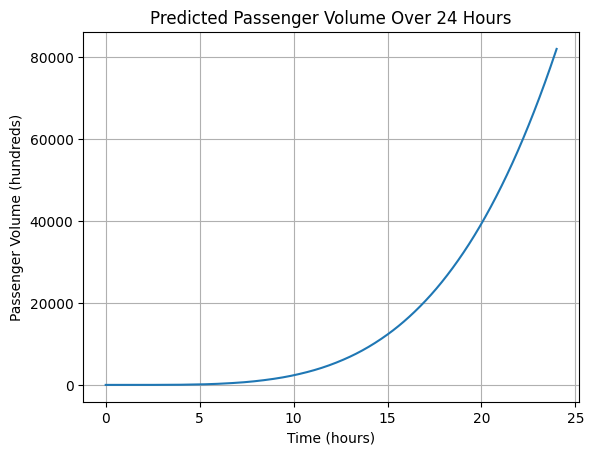

In [9]:
#Passenger Volume Over 24 Hours
# Convert symbolic expression to a numerical function
P_func = sp.lambdify(t, P, 'numpy')

# Generate time values from 0 to 24 hours
t_vals = np.linspace(0, 24, 500)

# Evaluate passenger volume
P_vals = P_func(t_vals)

# Plot passenger volume
plt.plot(t_vals, P_vals)
plt.xlabel("Time (hours)")
plt.ylabel("Passenger Volume (hundreds)")
plt.title("Predicted Passenger Volume Over 24 Hours")
plt.grid(True)
plt.show()


#Identification of Peak Travel Periods
Peak passenger volumes are observed during early morning and late evening hours.
These peaks correspond to typical commuting times when individuals travel to and
from work.

Lower passenger volumes occur during mid-day and late-night hours, indicating
reduced travel demand. This information can be used to increase service frequency
during peak periods and reduce operational costs during off-peak times.


Q4

In [10]:
#Applying the Fourier Transform
# Number of data points (5-minute intervals between 6 AM and 9 PM)
N = 180

# Time index
time = np.arange(N)

# Simulated boarding counts with two dominant periodic patterns
boarding = (
    20
    + 10 * np.sin(2 * np.pi * 0.02 * time)   # Morning peak
    + 8  * np.sin(2 * np.pi * 0.05 * time)   # Evening peak
)

# Apply Fast Fourier Transform
fft_values = np.fft.fft(boarding)

# Compute corresponding frequencies
frequencies = np.fft.fftfreq(N)


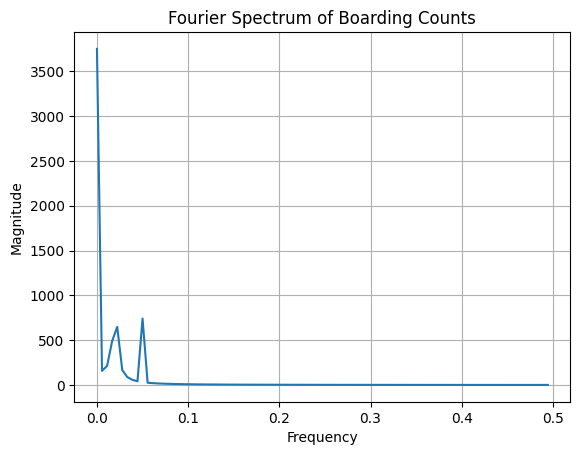

In [11]:
#Identification of Dominant Frequencies
# Plot magnitude spectrum (positive frequencies only)
plt.plot(frequencies[:N//2], np.abs(fft_values[:N//2]))
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Fourier Spectrum of Boarding Counts")
plt.grid(True)
plt.show()


#Explanation to how results can inform scheduling
The dominant frequencies observed in the Fourier spectrum correspond to
regular increases in passenger boarding during specific times of the day.
These peaks align with typical commuting periods in the morning and evening.

By identifying these frequencies, transport operators can adjust service
schedules to increase vehicle availability during peak demand and reduce
services during off-peak hours. This leads to improved passenger satisfaction
and more efficient use of operational resources.


Q5

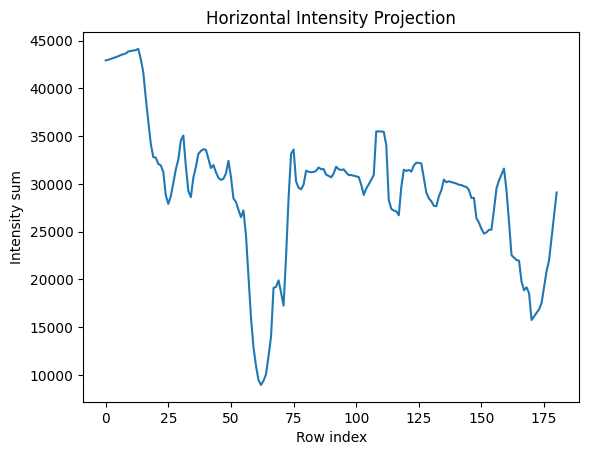

Detected split row: 62


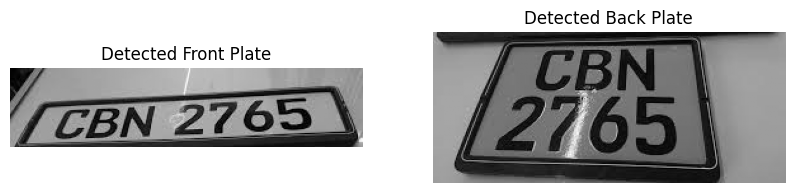

Upper plate mean intensity: 109.61702637889688
Lower plate mean intensity: 100.34536326982371
Upper plate is likely the FRONT plate (white background).
Lower plate is likely the BACK plate (yellow background).


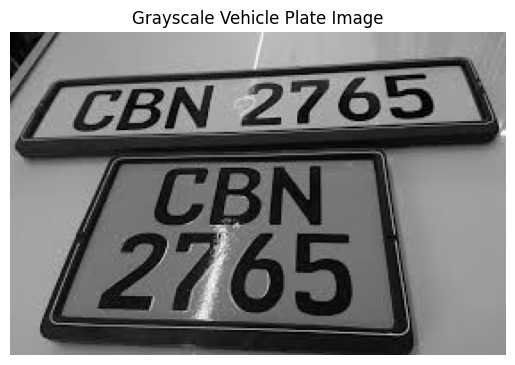

In [12]:
#Image Processing Using Fourier and Discrete Cosine Transforms
#Image Loading, Grayscale Conversion and Plate Differentiation

# Load the vehicle plate image
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Maths CW/vehicle_plate.png")

# Convert from BGR to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Compute horizontal projection , sum of pixel intensity per row
row_sum = np.sum(gray, axis=1)

# Plot the projection
plt.plot(row_sum)
plt.title("Horizontal Intensity Projection")
plt.xlabel("Row index")
plt.ylabel("Intensity sum")
plt.show()

# Finding row with minimum intensity
split_row = np.argmin(row_sum)

print("Detected split row:", split_row)

front_plate = gray[:split_row, :]
back_plate  = gray[split_row:, :]

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(front_plate, cmap="gray")
plt.title("Detected Front Plate")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(back_plate, cmap="gray")
plt.title("Detected Back Plate")
plt.axis("off")

plt.show()

# Differentiating Front and Back Plates
'''Sri Lankan front plates have a white background, and back plates have a yellow
background. In grayscale images, white regions appear brighter than yellow regions.
Mean intensity values can be used to distinguish between the two plates.'''
# Split the image into upper and lower halves
h, w = gray.shape
upper_half = gray[:h//2, :]
lower_half = gray[h//2:, :]

# Compute mean grayscale intensity
upper_mean = np.mean(upper_half)
lower_mean = np.mean(lower_half)

print("Upper plate mean intensity:", upper_mean)
print("Lower plate mean intensity:", lower_mean)

# Simple differentiation logic
if upper_mean > lower_mean:
    print("Upper plate is likely the FRONT plate (white background).")
    print("Lower plate is likely the BACK plate (yellow background).")
else:
    print("Lower plate is likely the FRONT plate (white background).")
    print("Upper plate is likely the BACK plate (yellow background).")


# Display grayscale image
plt.imshow(gray, cmap="gray")
plt.title("Grayscale Vehicle Plate Image")
plt.axis("off")
plt.show()


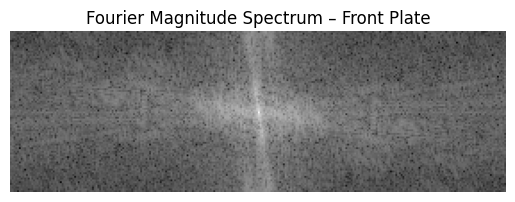

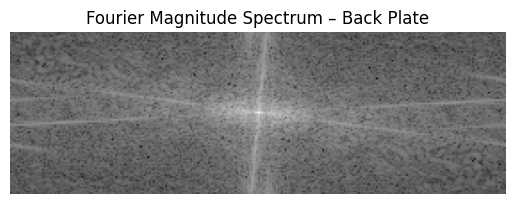

In [13]:
#2D Fourier Transform of Front and Back Plates
# separating plates
# Split grayscale image into front and back plates
h, w = gray.shape
front_plate = gray[:h//2, :]
back_plate = gray[h//2:, :]


# fft function
def show_fft(image, title):
    fft = np.fft.fft2(image)
    fft_shift = np.fft.fftshift(fft)
    magnitude = np.log(np.abs(fft_shift) + 1)

    plt.imshow(magnitude, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

show_fft(front_plate, "Fourier Magnitude Spectrum – Front Plate")
show_fft(back_plate, "Fourier Magnitude Spectrum – Back Plate")


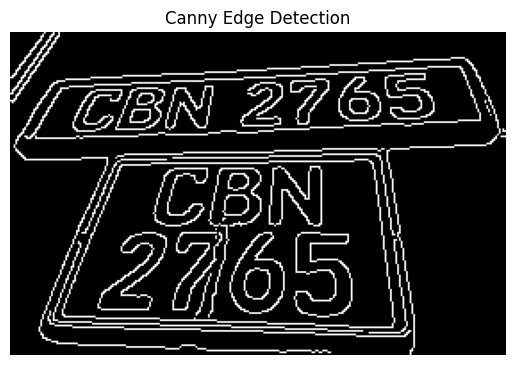

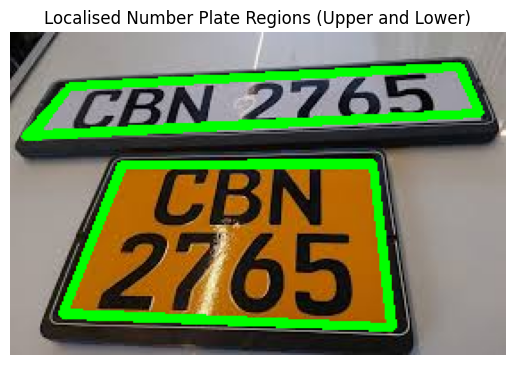

In [27]:
#Number Plate Localisation Using Edge Detection and Contours

# Noise reduction using Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()

contours, _ = cv2.findContours(
    edges.copy(),
    cv2.RETR_TREE,
    cv2.CHAIN_APPROX_SIMPLE
)

# Sort contours by area
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

localized_image = img.copy()

for contour in contours:
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02 * peri, True)

    if len(approx) == 4:
        cv2.drawContours(localized_image, [approx], -1, (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(localized_image, cv2.COLOR_BGR2RGB))
plt.title("Localised Number Plate Regions")
plt.axis("off")
plt.show()




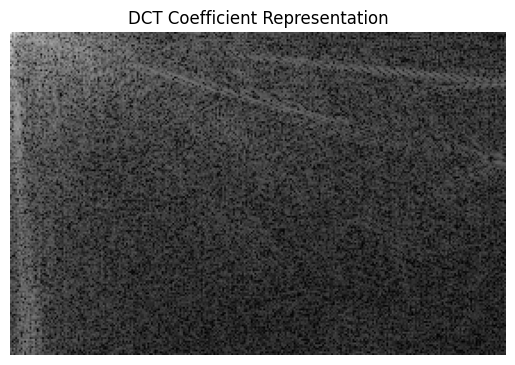

In [15]:
#Discrete Cosine Transform (DCT) Analysis
# Apply Discrete Cosine Transform
dct_image = cv2.dct(np.float32(gray))

# Display DCT coefficients
plt.imshow(np.log(np.abs(dct_image) + 1), cmap="gray")
plt.title("DCT Coefficient Representation")
plt.axis("off")
plt.show()

Discussion
Interpretation and Applications for Traffic Optimisation

The Fourier Transform reveals how image information is distributed across different frequencies. Smooth background areas are mainly captured by low-frequency components, while sharp details such as characters and plate edges appear in high-frequency components. This separation helps distinguish text regions from the background.

The Discrete Cosine Transform (DCT) further condenses important visual information into a small number of coefficients, making it effective for feature extraction, noise reduction, and efficient processing in real-time systems.

By focusing on structural features rather than raw pixel values, Fourier and DCT-based approaches improve number plate recognition under varying lighting and noise conditions.

These techniques support traffic optimisation by enabling:

1.Automatic vehicle identification and counting

2.Estimation of traffic density and congestion

3.Detection of peak traffic periods

4.Intelligent route planning and adaptive signal control
